# Analysis of molecular dynamics trajectories

- This notebook introduces basic molecular dynamics (MD) analysis using:
    0. VMD
    1. distances, 
    2. dihedral angles, 
    3. conformations, and
    4. free energy differences. 

_____

- A trajectory of the tryptophan-cage miniprotein (PDB code 1L2Y)  is provided, which originated from a 500 ns simulation in the NPT ensemble, at body temperature (310 K) and atmospheric pressure (1 atm).

# 1 Tryptophan cage

We will first take a look at the miniprotein. 


- Open VMD and load the file "protein_solvent.gro" using **file > New Molecule > Browse**

This shows the triclinic unit cell used in the simulation. It is seen that most space (and therefore most CPU-time) is occupied by water molecules, which is necessary to simulate the miniprotein at physiological conditions: in a solvent, and not in the vacuum of empty space. 

- Goto **Graphics > Representations > Create Rep** In the 'Selected Atoms' box, write **protein** and select 'Drawing Method' **NewCartoon**. This representation reveals that the Trp-cage consists of an $\alpha$-helix, an $\alpha$-helical loop, and a larger loop. 

Because the trajectory file of all atoms (including solvent) is too large to share, we have provided a trajectory file (protein.xtc) containing only the protein coordinates (with limited precision). To vizualize this trajectory, we must first load a .gro file with compatible topology (without solvent). 

- **Goto File > New Molecule > Browse** and load the file 'protein.gro'. You can now **Browse** again to load data into this molecule. Load the file 'protein.xtc', and **use the load all at once** option. 

This trajectory has been pre-centered, subsampled and aligned to show a 'stationary' trajectory, ameliorating visual analysis. You can **hide the water box** by double-clicking 'D' (Display) on the protein_solvent.gro molecule, in the VMD Main window. 

- VMD quick keys:
    1. R: rotation mode
    2. C: click on an atom, which becomes the center for rotation
    3. T: translation mode
    4. 1: click on an atom, its label (name+index) is now shown
    5. 2: click on two atoms, the bond length is now shown
    
    
- **Create two representations**. One using Newcartoon (selection: protein), and one using CPK (selection: resid 0 19). You can click the 'play' button on the VMD window to watch the trajectory, and you can move the slider to quickly go through the trajectory.

# 2 Numpy trajectory

- MD analysis libraries are plentiful, but their installation can take some time. Therefore, we provide the entire (protein)-trajectory as a numpy array. In the cell below, we import some modules, and we load some context data of the simulation, which could otherwise be simply obtained using analysis libraries.


- The following units are used:
    1. Time: ns 
    2. Position: nm

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# The protein-trajectory: shape: N_frames x N_atoms x 3
traj_shape = [50000,304,3]
traj = np.zeros(traj_shape, float)

a = 8
step = int(np.floor(len(traj)/a))

for i in range(a):
    traj[i*step:(i+1)*step]=np.load("positions_"+str(i)+".npy")
print("trajectory shape: "+str(traj.shape))

# Positions were saved every 10 ps. We transform it to ns
t = np.array([i/100 for i in range(len(traj))]) 
print("trajectory: from "+str(t[0])+" ns to "+str(t[-1])+ " ns.")

# Avogadro's constant and Boltzmann's constant
NA = 6.0221409e+23 # entities/mol
k = 1.380649e-26 * NA # kJ / (K * mol)

# Carbon alpha (CA) indices of the residues. 
# E.g.: the trajectory for the CA atom of the first residue is 
#       is given by traj[:,4,:]
carbon_alpha_ids = [4, 18, 37, 58, 77, 94, 118, 
                    137, 159, 171, 178, 187, 199, 
                    210, 221, 228, 254, 268, 282, 294]

# Names of the residues
residues = ['ASN', 'LEU', 'TYR', 'ILE', 'GLN', 'TRP', 
            'LEU', 'LYS', 'ASP', 'GLY', 'GLY', 'PRO', 
            'SER', 'SER', 'GLY', 'ARG', 'PRO', 'PRO', 
            'PRO', 'SER']

# Indexing the residues
residue_ids = [i for i in range(len(residues))]

# Atoms, and their masses
atoms = ['N', 'H', 'H', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'C', 'H', 'C', 'H', 'C', 'O', 'H', 'C', 'H', 'C', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'C', 'H', 'N', 'H', 'C', 'C', 'C', 'H', 'C', 'H', 'C', 'H', 'C', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'N', 'H', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'O', 'O', 'C', 'O', 'N', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'O', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'O', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'N', 'H', 'C', 'N', 'H', 'H', 'N', 'H', 'H', 'C', 'O', 'N', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'C', 'H', 'H', 'C', 'H', 'C', 'H', 'H', 'C', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'O', 'H', 'C', 'O', 'O']
atom_masses = np.array([14.006999969482422, 1.0080000162124634, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 12.01099967956543, 1.0080000162124634, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 12.01099967956543, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 14.006999969482422, 1.0080000162124634, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 15.99940013885498, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 15.99940013885498, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 15.99940013885498, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 14.006999969482422, 1.0080000162124634, 1.0080000162124634, 14.006999969482422, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 14.006999969482422, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 12.01099967956543, 1.0080000162124634, 1.0080000162124634, 15.99940013885498, 1.0080000162124634, 12.01099967956543, 15.99940013885498, 15.99940013885498])

# Dihedral angles
# E.g.: [C, N, C_alpha, C] atoms for Phi-dihedral:
phi_ids = [None, [14, 16, 18, 33], [33, 35, 37, 54], [54, 56, 58, 73], [73, 75, 77, 90], [90, 92, 94, 114], [114, 116, 118, 133], [133, 135, 137, 155], [155, 157, 159, 167], [167, 169, 171, 174], [174, 176, 178, 181], [181, 183, 187, 195], [195, 197, 199, 206], [206, 208, 210, 217], [217, 219, 221, 224], [224, 226, 228, 248], [248, 250, 254, 262], [262, 264, 268, 276], [276, 278, 282, 290], [290, 292, 294, 301]]
psi_ids = [[0, 4, 14, 16], [16, 18, 33, 35], [35, 37, 54, 56], [56, 58, 73, 75], [75, 77, 90, 92], [92, 94, 114, 116], [116, 118, 133, 135], [135, 137, 155, 157], [157, 159, 167, 169], [169, 171, 174, 176], [176, 178, 181, 183], [183, 187, 195, 197], [197, 199, 206, 208], [208, 210, 217, 219], [219, 221, 224, 226], [226, 228, 248, 250], [250, 254, 262, 264], [264, 268, 276, 278], [278, 282, 290, 292], None]
omega_ids = [[4, 14, 16, 18], [18, 33, 35, 37], [37, 54, 56, 58], [58, 73, 75, 77], [77, 90, 92, 94], [94, 114, 116, 118], [118, 133, 135, 137], [137, 155, 157, 159], [159, 167, 169, 171], [171, 174, 176, 178], [178, 181, 183, 187], [187, 195, 197, 199], [199, 206, 208, 210], [210, 217, 219, 221], [221, 224, 226, 228], [228, 248, 250, 254], [254, 262, 264, 268], [268, 276, 278, 282], [282, 290, 292, 294], None]
chi1_ids = [[0, 4, 6, 9], [16, 18, 20, 23], [35, 37, 39, 42], None, [75, 77, 79, 82], [92, 94, 96, 99], [116, 118, 120, 123], [135, 137, 139, 142], [157, 159, 161, 164], None, None, [183, 187, 189, 192], None, None, None, [226, 228, 230, 233], [250, 254, 256, 259], [264, 268, 270, 273], [278, 282, 284, 287], None]



trajectory shape: (50000, 304, 3)
trajectory: from 0.0 ns to 499.99 ns.


## &#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;

- Find the indices of the atoms involved in a
    1. C-H bond
    2. C=C bond
    3. N-H bond
- and plot their bond lengths over the trajectory.

In [2]:
# Plot bond lengths:
# TODO


# 3 RMSD and radius of gyration.

- While looking at the trajectory in VMD can already show valuable information, numbers can and will reveal which direction you should be looking at. Two such numbers (for every frame) can be found in the **Root Mean Squared Distance (RMSD)** and the **Radius of Gyration (Rg)**. The RMSD is a measure of how structurally similar frames are to a certain reference frame. Rg reveals how 'compact' the protein structure is at every frame, it is a measure for the protein's inertial mass. The formulas are:


$$ R_g(t) = \frac{\sum_{i=1}^{N_{atoms}}m_{i}({r(t)}-{r_{COM}(t)})}{\sum_{i=1}^{N_{atoms}}m_{i}} $$

$$ RMSD(t) = \sqrt{\frac{1}{N_{C^{\alpha}}}\sum_{i=1}^{N_{C^{\alpha}}}|r(t) - r_{REF}|^2} $$

where $r_{COM}(t)$ is the protein center of mass at time $t$, $r_{REF}$ is a chosen reference frame (often the first frame), and where the sum for the RMSD is taken over the $N_{C^{\alpha}}$ carbon alpha positions. Only the carbon alphas are taken into the RMSD, as we are interested in structural differences, rather than the contribution of the fast fluctuating, low-mass hydrogen atoms. 

<IPython.core.display.Javascript object>


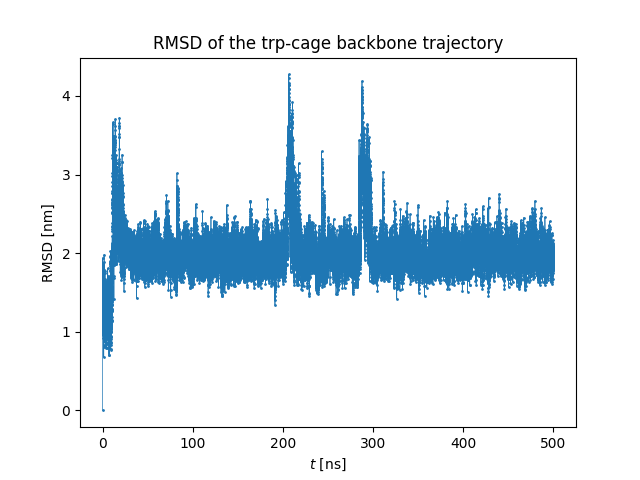

<IPython.core.display.Javascript object>


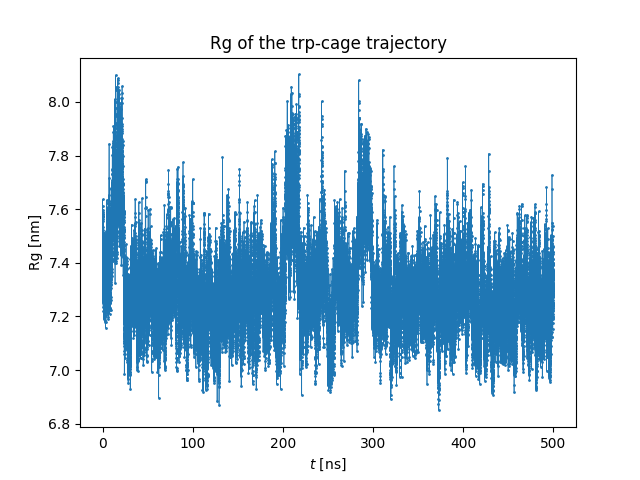

In [3]:
reference_frame = traj[0,carbon_alpha_ids,:]
all_frames = traj[:,carbon_alpha_ids,:]
RMSD = np.sqrt(np.mean(np.sum((all_frames-reference_frame)**2,axis=-1),axis=1))

fig,ax =plt.subplots()
ax.plot(t,RMSD,'-o',lw=0.5,ms=1)
ax.set_title("RMSD of the trp-cage backbone trajectory")
ax.set_xlabel(r"$t$ [ns]")
ax.set_ylabel(r"RMSD [nm]")

def rg(xyz, masses):
    # From mdtraj library
    weights = masses / masses.sum()

    mu = xyz.mean(1)
    centered = (xyz.transpose((1, 0, 2)) - mu).transpose((1, 0, 2))
    squared_dists = (centered ** 2).sum(2)
    Rg = (squared_dists * weights).sum(1) ** 0.5
    
    return Rg

fig,ax=plt.subplots()
ax.plot(t,rg(traj,atom_masses),'-o',lw=0.5,ms=1)
ax.set_title("Rg of the trp-cage trajectory")
ax.set_xlabel(r"$t$ [ns]")
ax.set_ylabel(r"Rg [nm]")
fig.show()

## &#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;

- Is it a coincidence that both plots show similar deviating behaviour at similar times? 
- What does the deviating behaviour mean on the RMSD plot?
- What extra information does the Rg plot give us?


- Extra: The RMSD starts at very small values, why is that?

# 4 Dihedral angles

- Residues' (amino acids) backbone atoms are bound to each other in a rigid and planar fashion by the peptide bond. The planarity, however, covers only three atoms, allowing proteins to take on three-dimensional shapes. The angles between these backbone 3-atom-planes are called the $\phi$, $\psi$ and $\omega$ dihedral angles. These dihedrals take on specific values, as many are disallowed by, for instance, steric clash.


- A function to calculate the dihedrals is given below, together with the plots of $\phi$-angles of all the residues in the tryptophan cage. You can double-click on the left-hand side of the cell-output with many plots, to show/hide output.

In [4]:
def calc_dihedral(p):
    """
    Calculate the dihedral angles for 4-atom trajectory,
    i.e. the torsion angle around p1-p2 axis:
        
    p0
      \
       p1---p2
             |
             p3
               
    ----
    Adapted from mdtraj source code. 
    ----
    
    Parameter:
    p: np.ndarray, shape=(num_frames, 4, 3), dtype = float
    
    Returns: 
    dihedrals: np.ndarray, shape=(num_frames), dtype = float
    """
    
    p0 = p[:,0]
    p1 = p[:,1]
    p2 = p[:,2]
    p3 = p[:,3]

    b0 = p1 - p0
    b1 = p2 - p1
    b2 = p3 - p2

    c0 = np.cross(b1,b2)
    c1 = np.cross(b0,b1)
    
    d0 = (b0 * c0).sum(-1)
    d0 *= (b1 * b1).sum(-1) ** 0.5
    d1 = (c0 * c1).sum(-1)
    
    return np.degrees(np.arctan2(d0,d1))

ASN (res_id 0) does not have this dihedral angle, because it is missing an adjacent atom/residue.


<IPython.core.display.Javascript object>


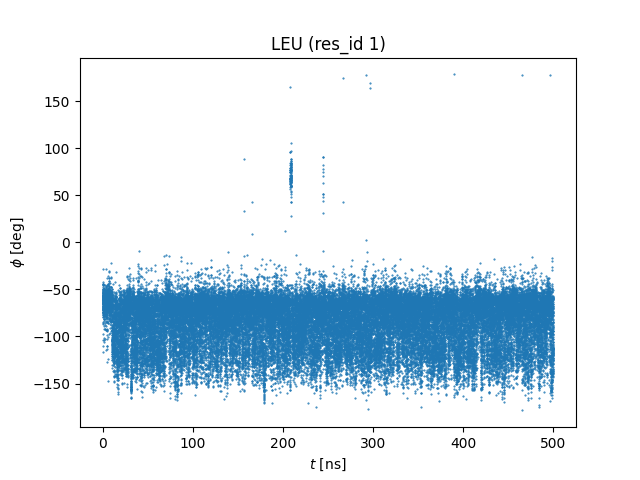

<IPython.core.display.Javascript object>


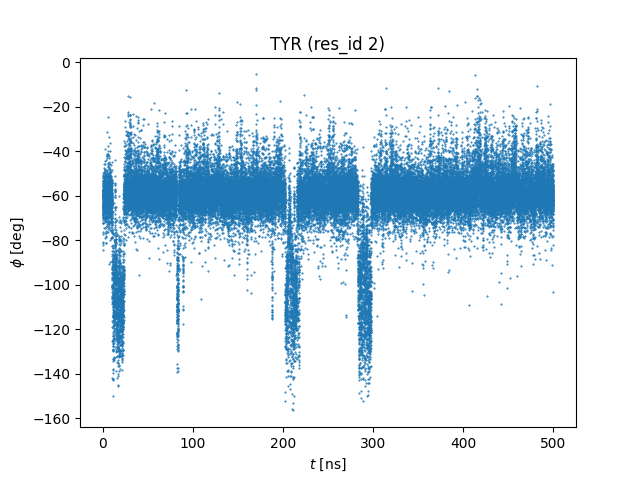

<IPython.core.display.Javascript object>


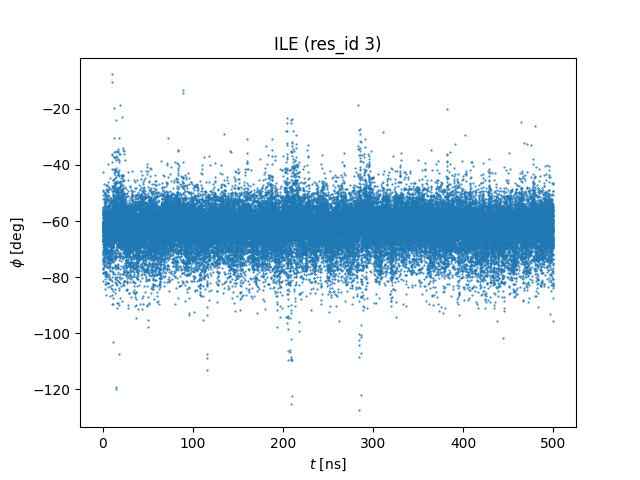

<IPython.core.display.Javascript object>


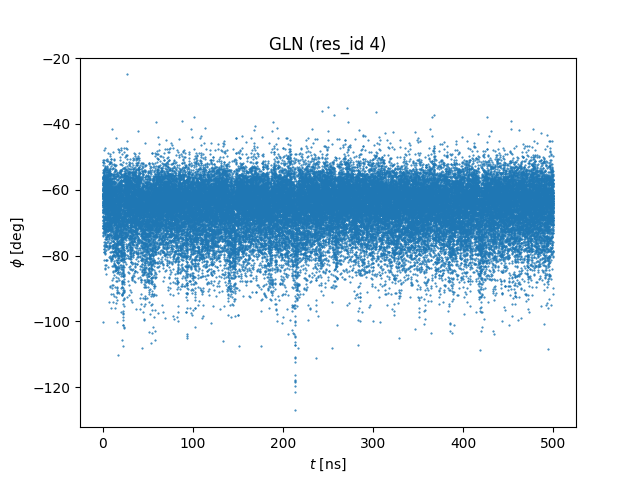

<IPython.core.display.Javascript object>


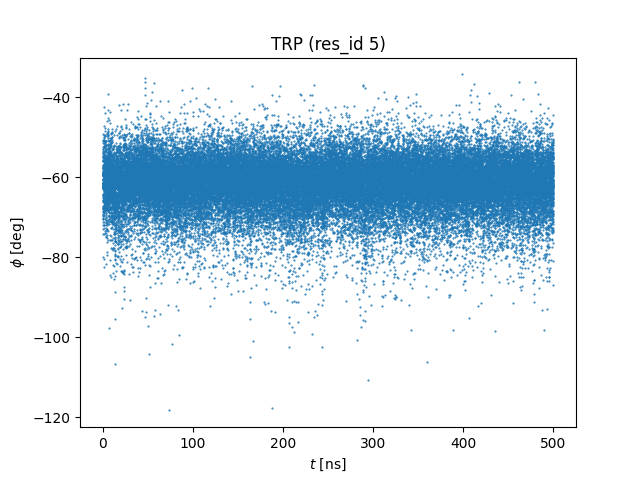

<IPython.core.display.Javascript object>


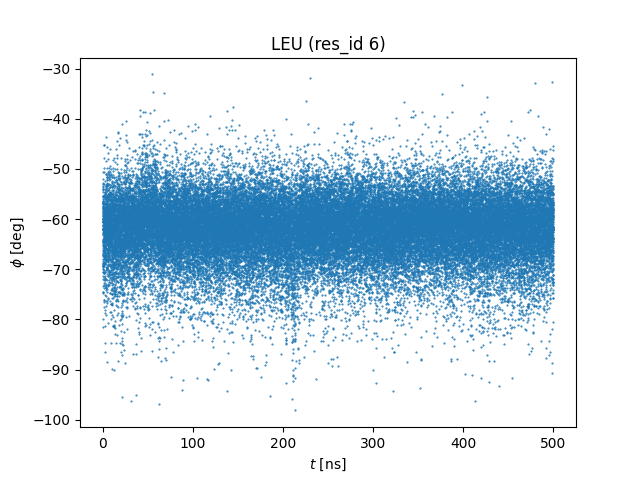

<IPython.core.display.Javascript object>


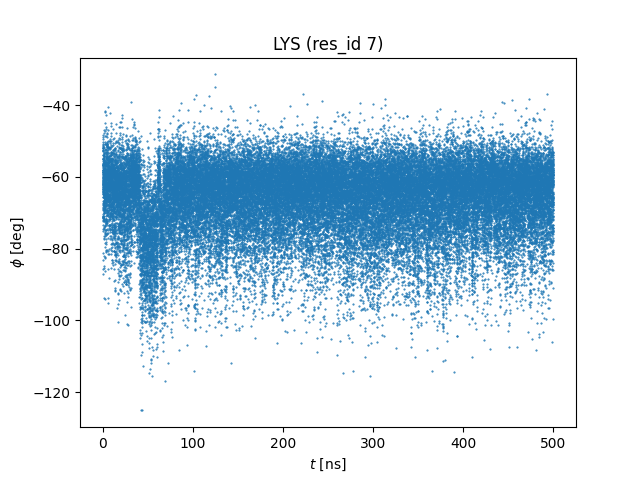

<IPython.core.display.Javascript object>


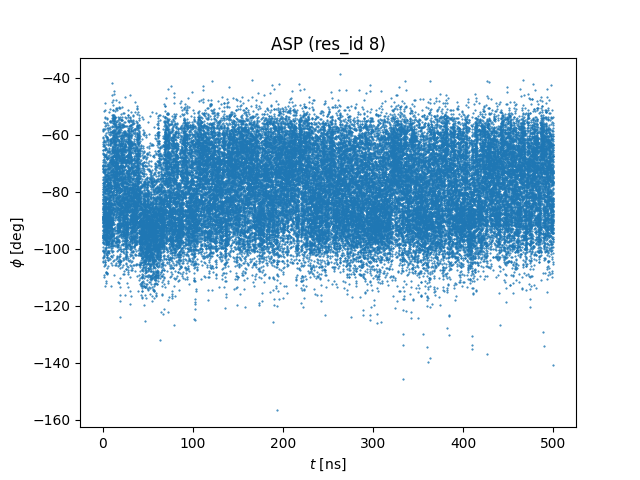

<IPython.core.display.Javascript object>


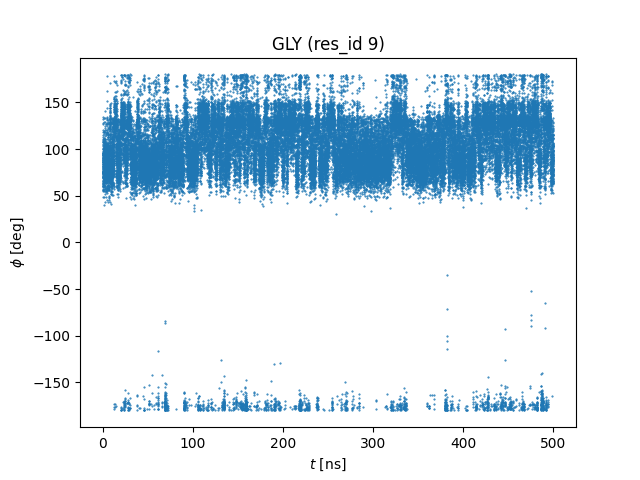

<IPython.core.display.Javascript object>


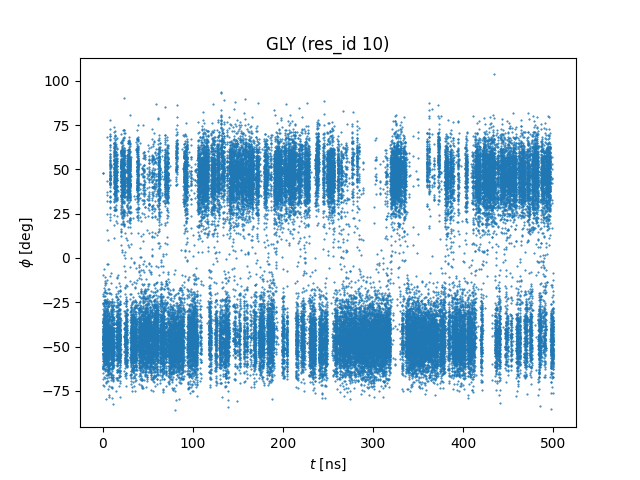

<IPython.core.display.Javascript object>


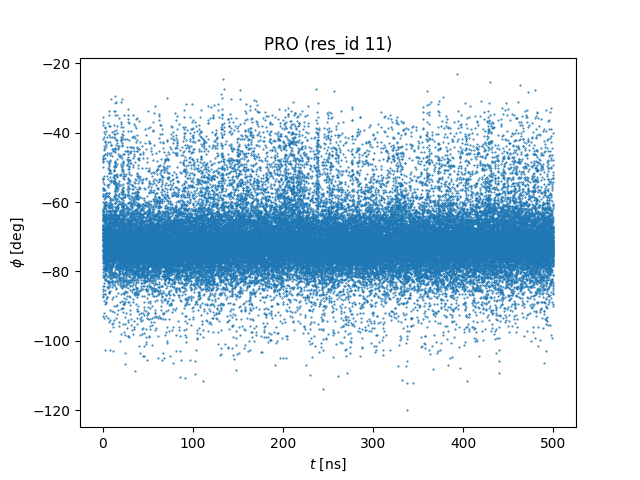

<IPython.core.display.Javascript object>


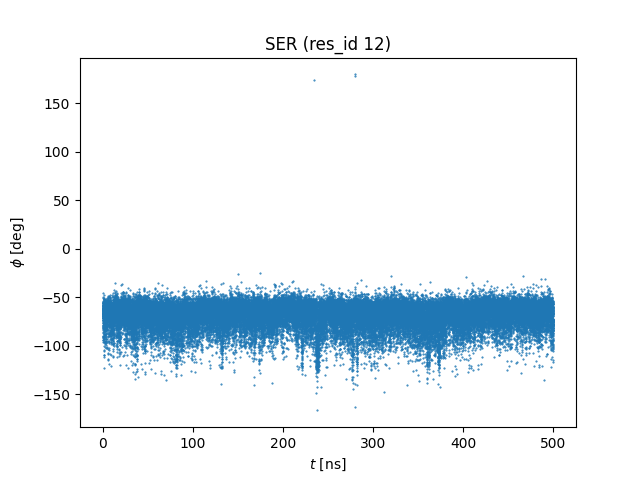

<IPython.core.display.Javascript object>


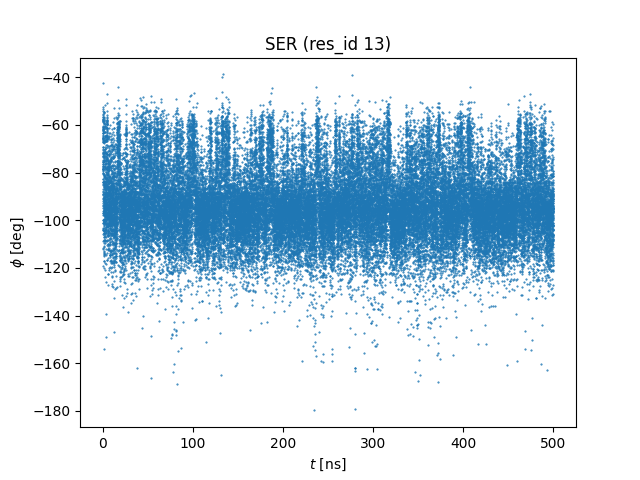

<IPython.core.display.Javascript object>


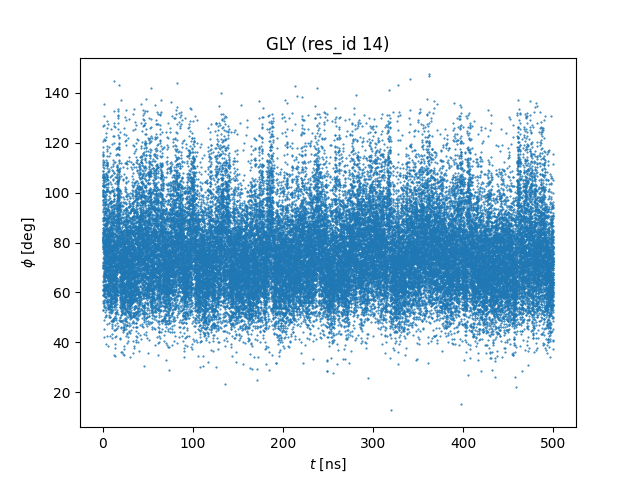

<IPython.core.display.Javascript object>


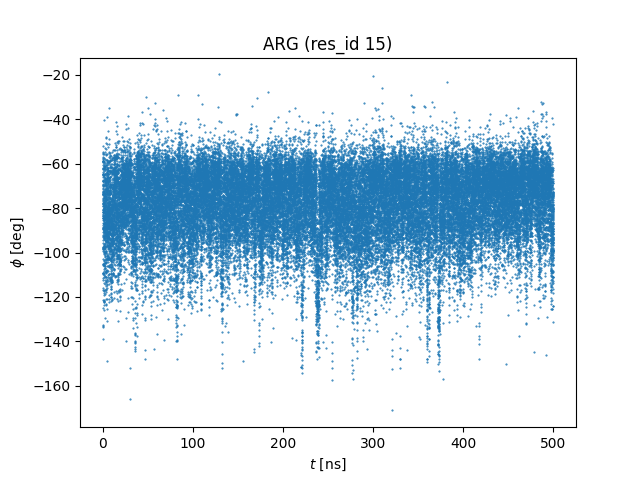

<IPython.core.display.Javascript object>


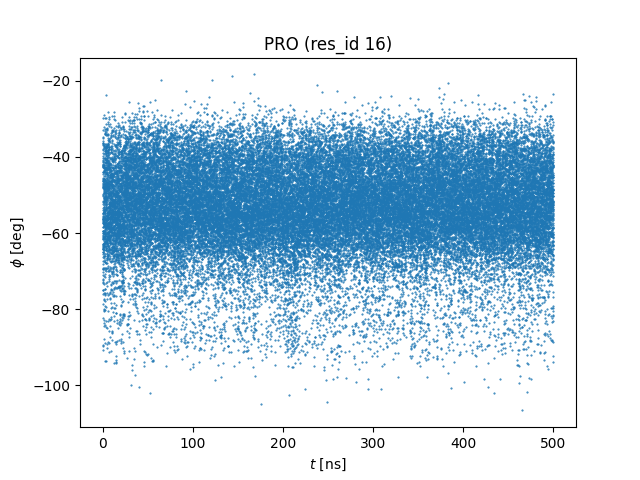

<IPython.core.display.Javascript object>


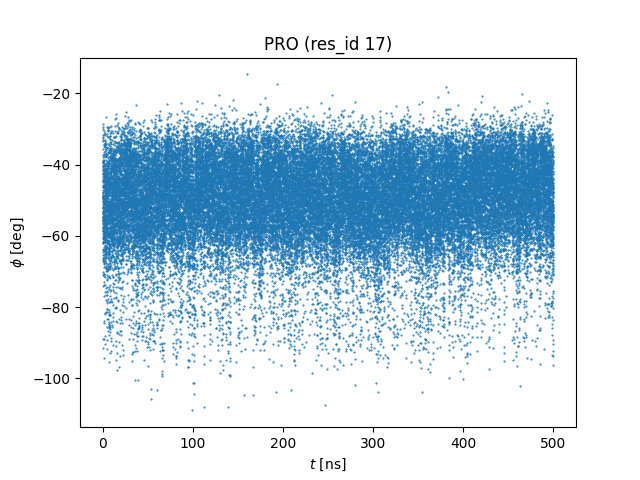

<IPython.core.display.Javascript object>


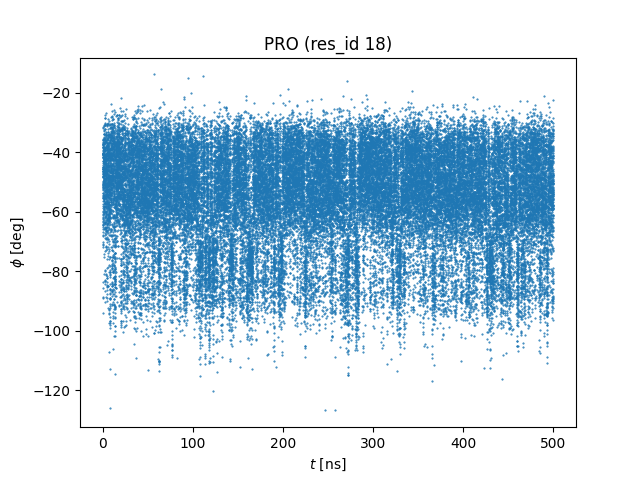

<ipython-input-5-a9b561153d3e>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots()


<IPython.core.display.Javascript object>


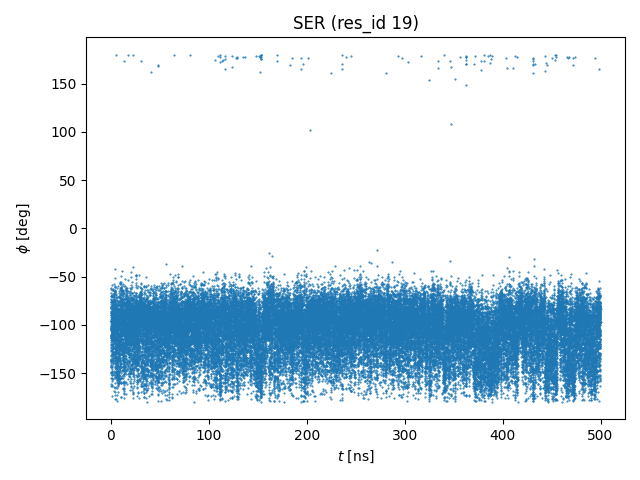

In [5]:
# Plot the phi dihedrals for each residue, iff it exists.
for res, res_id, res_phi in zip(residues,residue_ids, phi_ids):
    if res_phi is not None:
        fig,ax=plt.subplots()
        # Calculate the dihedral angle for every frame. The dihedral angle
        # is defined by four atom positions. For the case of the phi dihedral, 
        # we need the [C, N, C_alpha, C] indices, which are given by the 
        # indices in "res_phi". 
        phi_dihedrals = calc_dihedral(traj[:,res_phi,:]) # n_frames dihedral angles (1-dimensional)
        ax.plot(t,phi_dihedrals,'o',ms=.5)
        ax.set_title(str(res)+" (res_id "+str(res_id)+")")
        ax.set_xlabel(r"$t$ [ns]")
        ax.set_ylabel(r"$\phi$ [deg]")
    else:
        print(str(res)+" (res_id "+str(res_id)+") does not have this dihedral angle, because it is missing an adjacent atom/residue.")
fig.tight_layout()
        

## &#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;
- Which residues have states with different $\phi$ angles? 

- Which residue follows the time-behavior captured in the RMSD and Rg plots? 
    - Can you explain this, using VMD?
        -->also CPK resid 2 in VMD, and watch it cleave the polar contacts of resids 0 and 19 (which should have been CPK'd from the beginning of the notebook


# 5 Dihedral histograms

- Instead of looking at the time-behaviour, we can also histogram the dihedral angles of a residue.

ASN (res_id 0) does not have this dihedral angle, because it is missing an adjacent atom/residue.


<IPython.core.display.Javascript object>


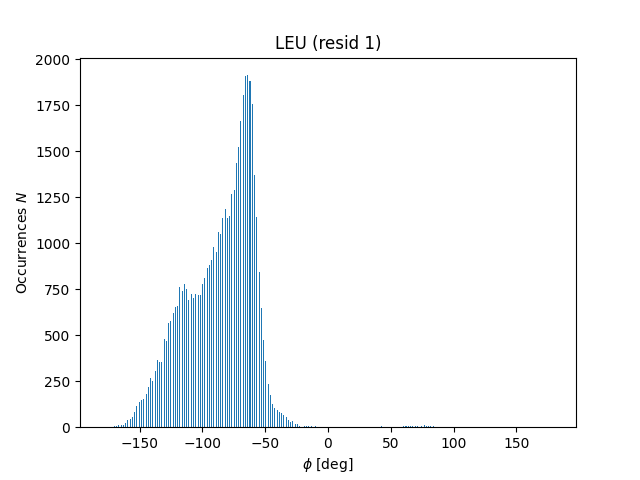

<IPython.core.display.Javascript object>


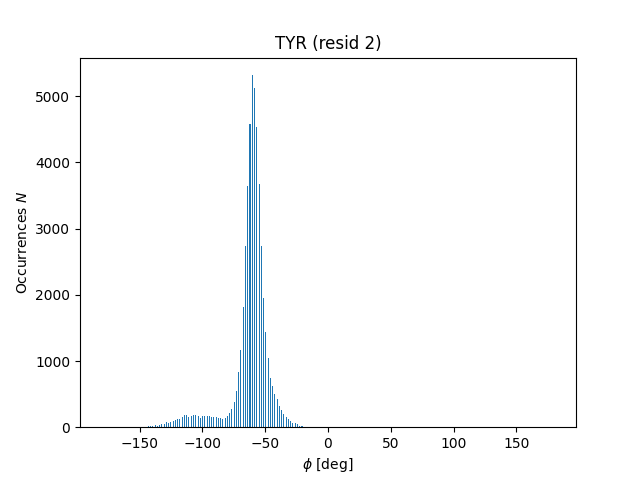

<IPython.core.display.Javascript object>


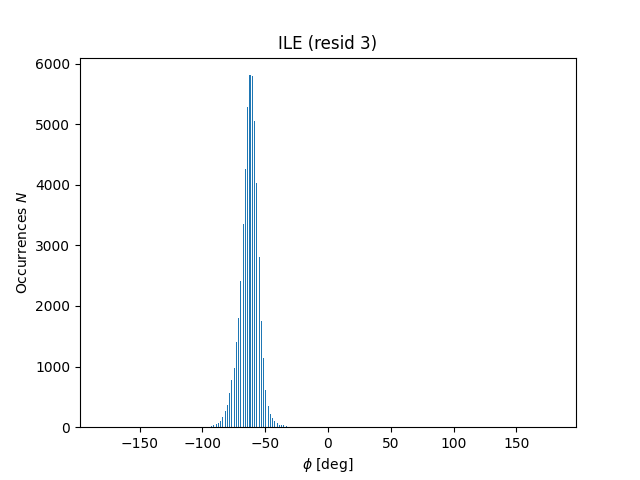

<IPython.core.display.Javascript object>


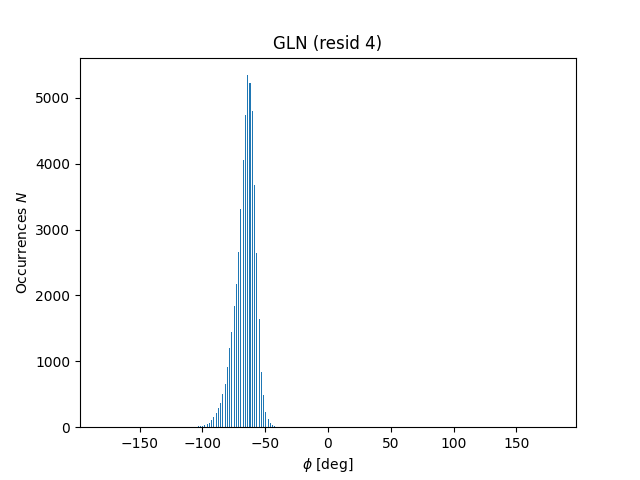

<IPython.core.display.Javascript object>


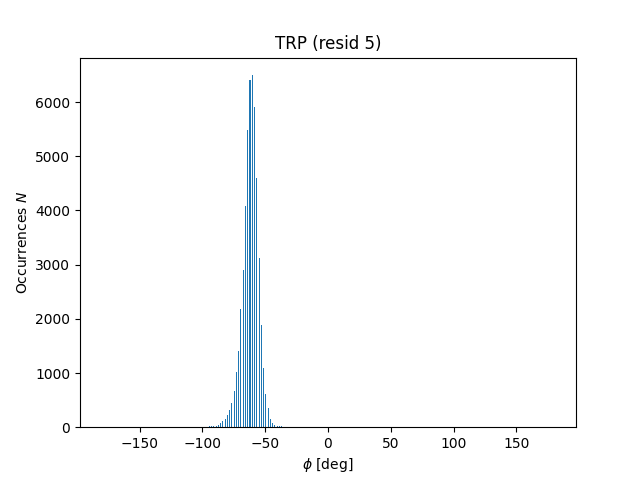

<IPython.core.display.Javascript object>


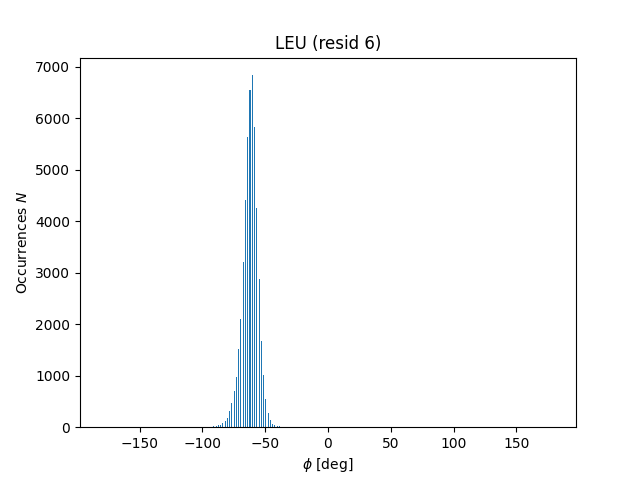

<IPython.core.display.Javascript object>


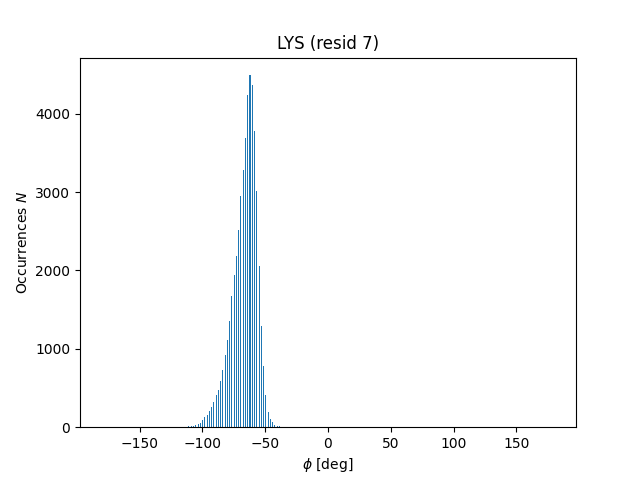

<IPython.core.display.Javascript object>


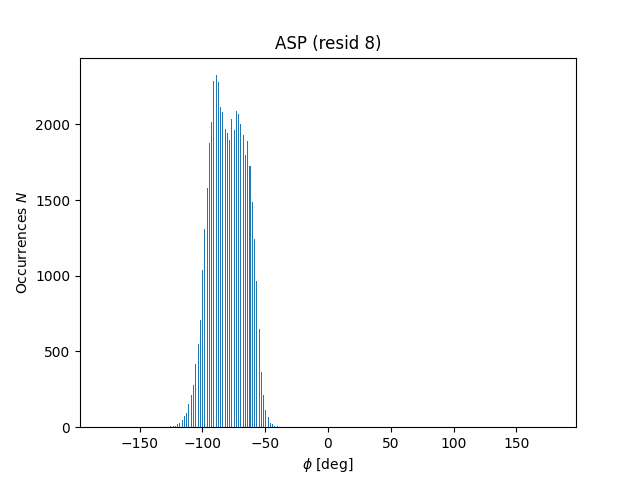

<IPython.core.display.Javascript object>


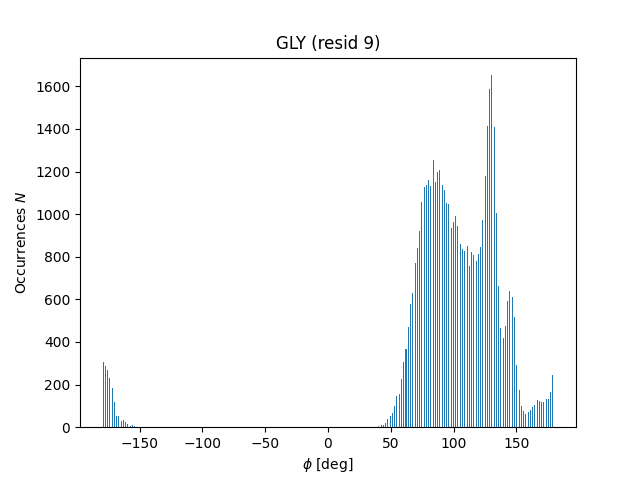

<IPython.core.display.Javascript object>


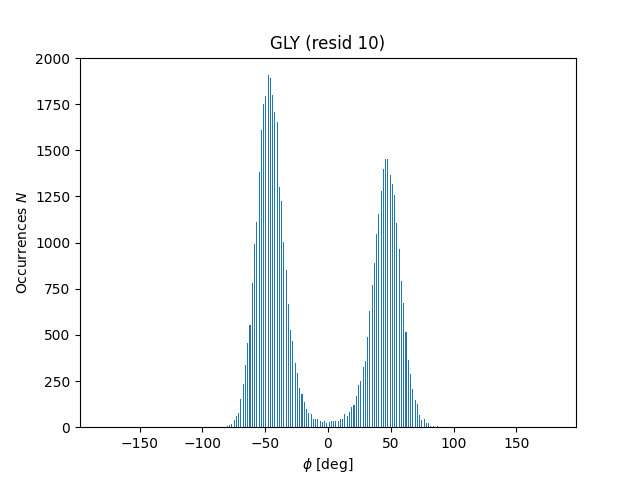

<IPython.core.display.Javascript object>


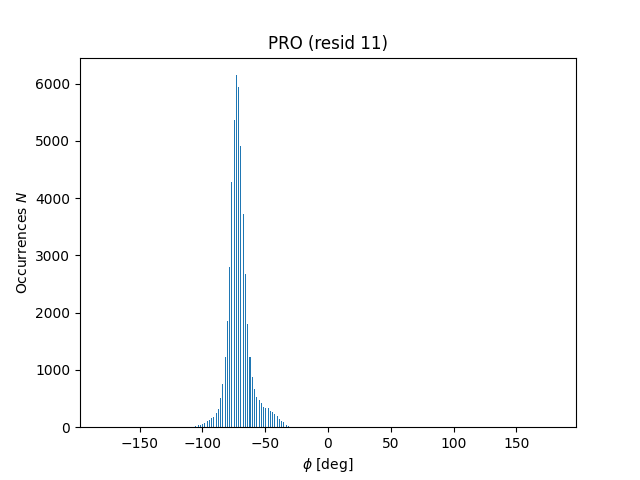

<IPython.core.display.Javascript object>


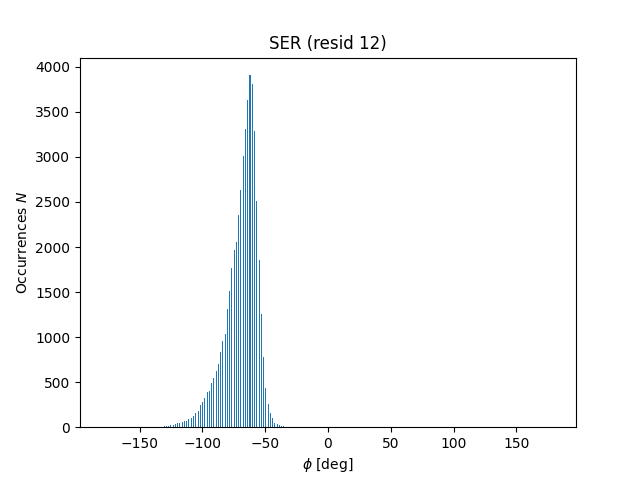

<IPython.core.display.Javascript object>


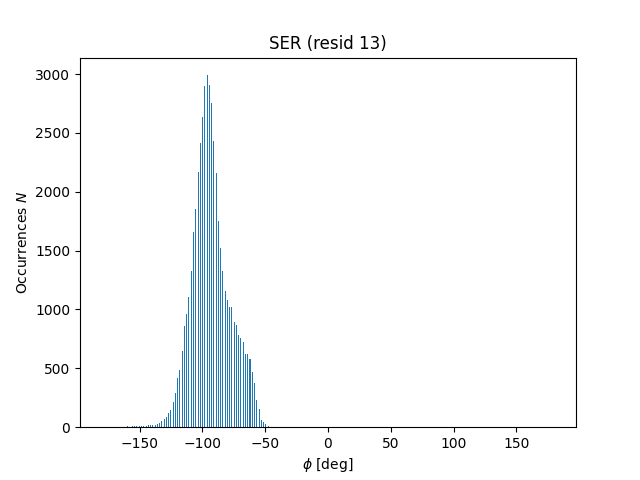

<IPython.core.display.Javascript object>


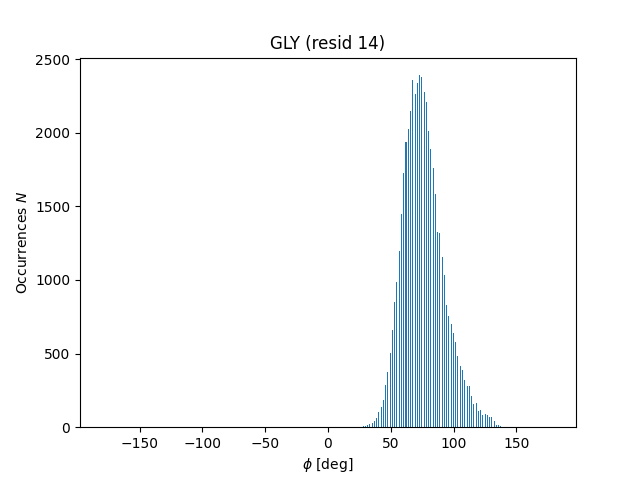

<IPython.core.display.Javascript object>


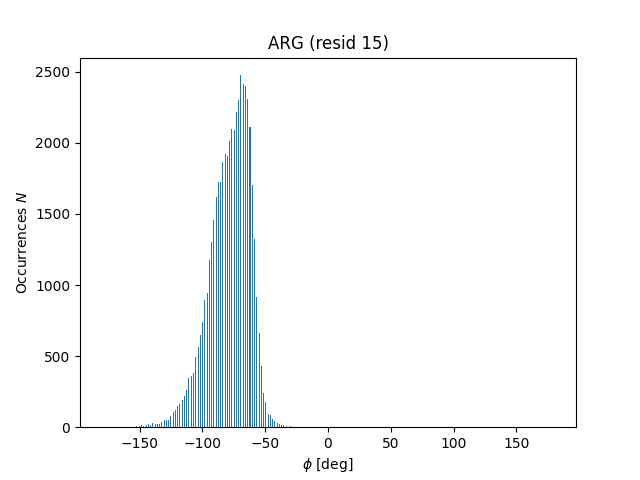

<IPython.core.display.Javascript object>


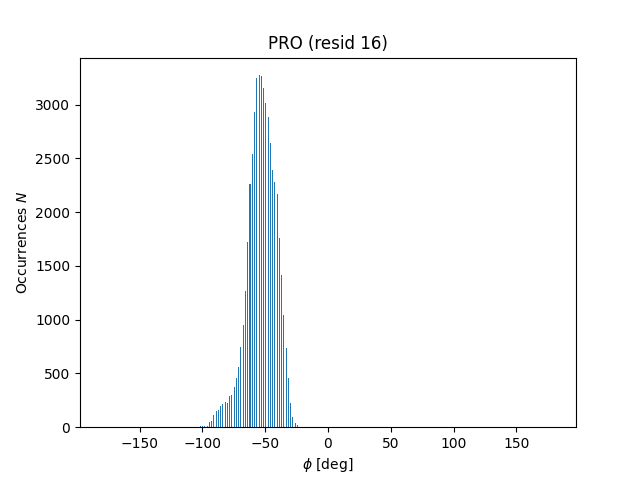

<IPython.core.display.Javascript object>


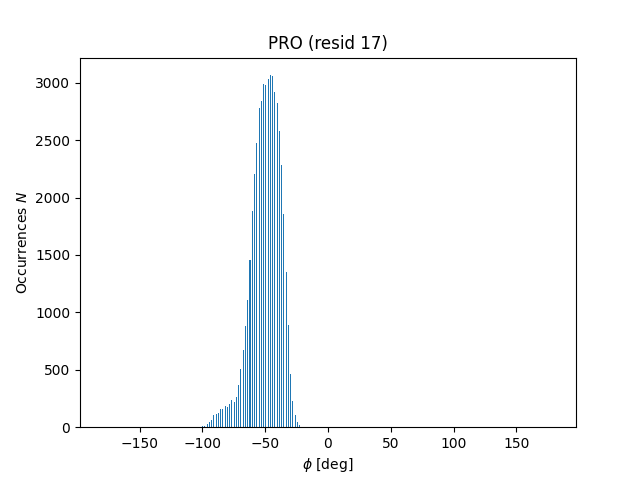

<IPython.core.display.Javascript object>


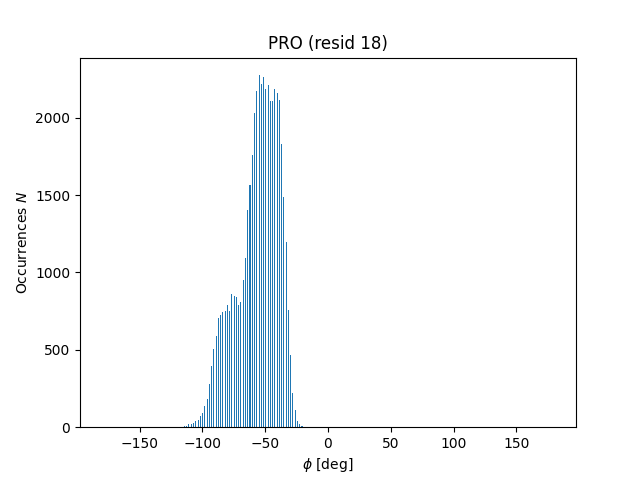

<IPython.core.display.Javascript object>


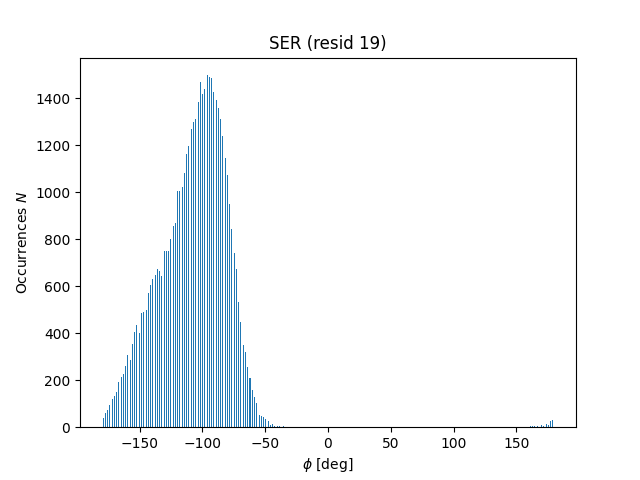

In [6]:
# Histograms
bins = np.linspace(-180,180,201)
mids = [(bins[i+1]+bins[i])/2 for i in range(len(bins)-1)]

for res, res_id, res_phi in zip(residues,residue_ids, phi_ids):
    if res_phi is not None:
        phi_dihedrals = calc_dihedral(traj[:,res_phi,:])
        hist, edges = np.histogram(phi_dihedrals,bins=bins)
        fig, ax = plt.subplots()
        ax.bar(mids,hist)
        ax.set_xlabel(r"$\phi$ [deg]")
        ax.set_ylabel(r"Occurrences $N$")
        ax.set_title(res + " (resid "+str(res_id)+")")
        fig.show()
    else:
        print(str(res)+" (res_id "+str(res_id)+") does not have this dihedral angle, because it is missing an adjacent atom/residue.")

## &#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;
- For those residues that clearly show TWO distinct states, **estimate** the free energy difference of those states. 

- Remember: the probability $P_A$ of being in state A is proportional to the Boltzmann factor $\exp(-F_A / (k_B T))$, where  $F_A$ is the (Landau) free energy of state A

 1. define states A and B ( = for which phi-interval are we in A, or in B?)
 2. From the histogram, determine $P_A$ and $P_B$
 3. Use the P <--> F relation to determine $F_A-F_B$ 
 

 
Avogadro's constant ($N_A$) and the Boltzmann constant ($k$) are already defined above, as NA and k.

- Are these results reliable? 

# 5 Polar contact
## &#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;&#x1F590;
- If not done yet, add a CPK representation for Residues 19 and 0.
- Find the indices of the (positively charged) oxygens and (negatively charged) nitrogen atom in these residues. 
- Calculate the distances between these atoms (thus, three in total). What do you notice? 